In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv("/content/title_single_valued_attrs.csv", delimiter=',')

In [ ]:
df.tail()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
30581,xingxing tan zhang,NaN,NaN,NaN,NaN,NaN,NaN,11.0,finished,10.0,original work,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0
30582,xiao jingling hui dou,NaN,NaN,NaN,NaN,NaN,NaN,12.0,finished,26.0,original work,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,NaN,NaN,NaN,NaN,NaN,9.0,1.0,0.0
30583,seiken gakuin no makentsukai,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,0.0,light novel,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0
30584,zombieland saga movie,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,1.0,original work,NaN,NaN,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0
30585,kingdom 4th season,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,0.0,manga,spring,2022.0,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0


##**Check for null values**

In [ ]:
print(df.isnull().sum() / len(df) * 100)
print(f"Total number of records: {len(df)}")

title                          0.000000
romaji_title                   0.008598
english_title                 47.884781
mean_score_anilist             3.043852
weighted_score_anilist        14.411006
popularity_anilist             0.008598
favorites_anilist             17.386071
duration                       3.886500
status                         0.008598
episodes                       2.932072
source                        14.419604
season_season                 21.134996
season_year                   21.134996
media_type                     0.335340
anilist_url                    0.008598
creator                       40.042992
prequel                       78.718831
sequel                        78.237317
directors                     55.881341
status_completed_anilist       0.008598
status_planning_anilist        0.008598
status_current_anilist         0.008598
status_paused_anilist          0.008598
status_dropped_anilist         0.008598
start_date                    16.130696


##**Distribution and Central tendency**

### **Calculate Mode, Mean and Median**

In [ ]:
df['mean_score_anilist'] = df['mean_score_anilist'].apply(lambda x: x*10)

In [ ]:
# Anilist
# Prepare data
df_anilist = df.dropna(subset=['mean_score_anilist'])
df_anilist.reset_index(drop=True, inplace=True)
# df_anilist.head()
# Calculate mode
mode_anilist = df_anilist['mean_score_anilist'].mode().iloc[0]
print(mode_anilist) 
# Calculate mean
mean_anilist = round(df_anilist['mean_score_anilist'].mean(), 2)
print(mean_anilist)
# Calculate median
median_anilist = df_anilist['mean_score_anilist'].median()
print(median_anilist)

6.2
6.13
6.2


In [ ]:
# print(df_anilist.isnull().sum() / len(df_anilist) * 100)
# print(f"Total number of records: {len(df_anilist)}")
print(len(df_anilist['mean_score_anilist']))

11276


In [ ]:
# Anisearch
# Prepare data
df_anisearch = df.dropna(subset=['mean_score_anisearch'])
df_anisearch.reset_index(drop=True, inplace=True)
# Calculate mode
mode_anisearch = df_anisearch['mean_score_anisearch'].mode().iloc[0]
print(mode_anisearch) 
# Calculate mean
mean_anisearch = round(df_anisearch['mean_score_anisearch'].mean(), 2)
print(mean_anisearch)
# Calculate median
median_anisearch = df_anisearch['mean_score_anisearch'].median()
print(median_anisearch)
print(len(df_anisearch['mean_score_anisearch']))

0.0
5.17
5.48
6764


In [ ]:
# Mal
# Prepare data
df_mal = df.dropna(subset=['mean_score_mal'])
df_mal.reset_index(drop=True, inplace=True)
# Calculate mode
mode_mal = df_mal['mean_score_mal'].mode().iloc[0]
print(mode_mal) 
# Calculate mean
mean_mal = round(df_mal['mean_score_mal'].mean(), 2)
print(mean_mal)
# Calculate median
median_mal = df_mal['mean_score_mal'].median()
print(median_mal)
print(len(df_mal['mean_score_mal']))

6.52
6.54
6.57
8169


In [ ]:
# Kitsu
df_kitsu = df.dropna(subset=['mean_score_kitsu'])
df_kitsu.reset_index(drop=True, inplace=True)
# Calculate mode
mode_kitsu = df_kitsu['mean_score_kitsu'].mode().iloc[0]
print(mode_kitsu) 
# Calculate mean
mean_kitsu = round(df_kitsu['mean_score_kitsu'].mean(), 2)
print(mean_kitsu)
# Calculate median
median_kitsu = df_kitsu['mean_score_kitsu'].median()
print(median_kitsu)
print(len(df_kitsu['mean_score_kitsu']))

8.21
6.78
6.805
5716


### **Visualize Mean, Median, Mode on Anilist**

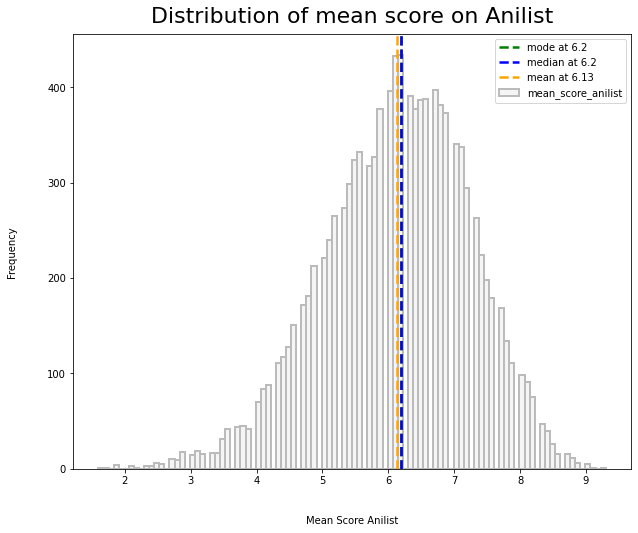

In [ ]:
df['mean_score_anilist'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Anilist', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Anilist', y=1.012, fontsize=22)
measurements = [mode_anilist, median_anilist, mean_anilist]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

**Insight**
* We can see that the Mode, the Median and also the Mean on Anilist is quite same, so it can tell that the dataset is distributed from the lowest to the highest.
Hence, if a begginer wants to watch a list of animes but doesn't known which one is good. Well, animes which have mean score greater than 6.0 seem not to be a bad one (can be enjoyed), but a good one? It depends on your taste. 



### **Visualize Mean, Median, Mode on Anisearch**



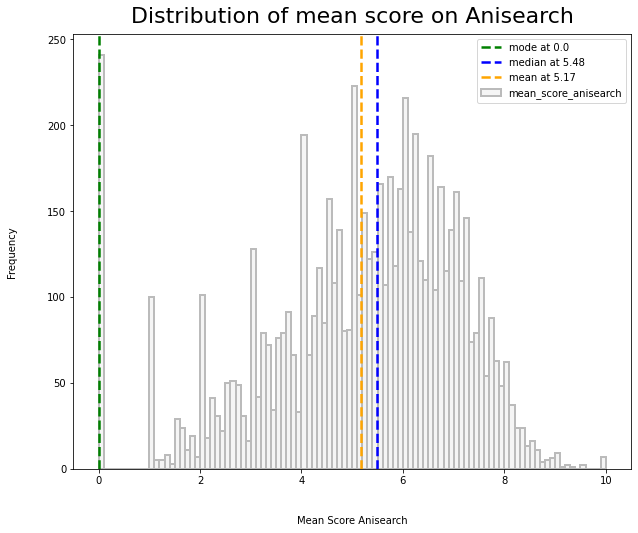

In [ ]:
df['mean_score_anisearch'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Anisearch', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Anisearch', y=1.012, fontsize=22)
measurements = [mode_anisearch, median_anisearch, mean_anisearch]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

### **Visualize Mean, Median, Mode on MAL**


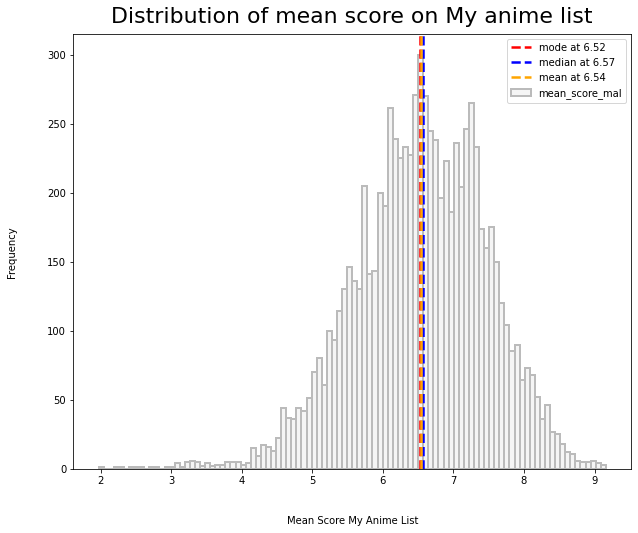

In [ ]:
df['mean_score_mal'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score My Anime List', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on My anime list', y=1.012, fontsize=22)
measurements = [mode_mal, median_mal, mean_mal]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

###**Visualize Mean, Median, Mode on kitsu**





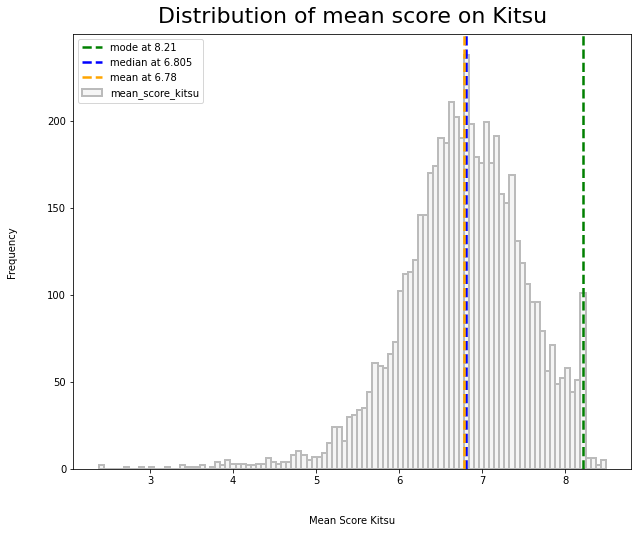

In [ ]:
df['mean_score_kitsu'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Kitsu', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Kitsu', y=1.012, fontsize=22)
measurements = [mode_kitsu, median_kitsu, mean_kitsu]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

**Insights**
*

## **Correlation Heatmaps**

In [ ]:
df.head()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,shingeki no kyojin,attack on titan,8.5,0.85,500176.0,46026.0,24.0,finished,25.0,manga,spring,2013.0,tv,https://anilist.co/anime/16498/shingeki-no-kyo...,tetsurou araki,shingeki no kyojin gaiden: kuinaki sentaku,shingeki no kyojin 2,hajime isayama,417696.0,35820.0,29872.0,8863.0,7925.0,2013-04-07,2013-09-28,8.60,31.0,1018.0,7017.0,472.0,584.0,70.0,102.0,6963.0,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,death note,death note,8.4,0.84,454179.0,34209.0,23.0,finished,37.0,manga,fall,2006.0,tv,https://anilist.co/anime/1535/death-note/,tetsurou araki,NaN,NaN,NaN,352362.0,45544.0,26067.0,16071.0,14135.0,2006-10-04,2007-06-27,9.00,4.0,1182.0,11442.0,452.0,916.0,128.0,295.0,11737.0,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,boku no hero academia,my hero academia,7.9,0.79,452700.0,23439.0,24.0,finished,13.0,manga,spring,2016.0,tv,https://anilist.co/anime/21459/boku-no-hero-ac...,kenji nagasaki,NaN,boku no hero academia 2,kouhei horikoshi,372716.0,37987.0,28066.0,7123.0,6808.0,2016-04-03,2016-06-26,8.18,152.0,273.0,3415.0,414.0,188.0,21.0,36.0,3185.0,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,kimetsu no yaiba,demon slayer: kimetsu no yaiba,8.5,0.85,444903.0,38842.0,24.0,finished,26.0,manga,spring,2019.0,tv,https://anilist.co/anime/101922/kimetsu-no-yaiba/,haruo sotozaki,NaN,kimetsu no yaiba: mugen ressha-hen,koyoharu gotouge,340821.0,48268.0,39899.0,9597.0,6318.0,2019-04-06,2019-09-28,8.68,20.0,237.0,2384.0,528.0,297.0,45.0,43.0,2335.0,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,hunter×hunter (2011),hunter x hunter (2011),9.0,0.90,415793.0,54890.0,24.0,finished,148.0,manga,fall,2011.0,tv,https://anilist.co/anime/11061/hunterhunter-2011/,hiroshi koujina,NaN,NaN,yoshihiro togashi,246373.0,69790.0,63687.0,27573.0,8370.0,2011-10-02,2014-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [ ]:
df.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

## **Correlation Test**


In [ ]:
from researchpy.correlation import corr_case

In [ ]:
# Anisearch
corr_case(df_anisearch[['mean_score_anisearch', 'popularity_anisearch',
                        'favorites_anisearch', 'number_scorer_anisearch' ]])

(  Pearson correlation test using list-wise deletion
 0                    Total observations used = 5574,
                         mean_score_anisearch  ... number_scorer_anisearch
 mean_score_anisearch                       1  ...                  0.4381
 popularity_anisearch                 -0.9797  ...                 -0.4461
 favorites_anisearch                   0.3378  ...                  0.8742
 number_scorer_anisearch               0.4381  ...                       1
 
 [4 rows x 4 columns],
                         mean_score_anisearch  ... number_scorer_anisearch
 mean_score_anisearch                  0.0000  ...                  0.0000
 popularity_anisearch                  0.0000  ...                  0.0000
 favorites_anisearch                   0.0000  ...                  0.0000
 number_scorer_anisearch               0.0000  ...                  0.0000
 
 [4 rows x 4 columns])

In [ ]:
# Anilist
corr_case(df_anilist[['mean_score_anilist', 'weighted_score_anilist',	'popularity_anilist', 'favorites_anilist']])

(  Pearson correlation test using list-wise deletion
 0                    Total observations used = 8582,
                        mean_score_anilist  ... favorites_anilist
 mean_score_anilist                      1  ...            0.2805
 weighted_score_anilist             0.9616  ...            0.3083
 popularity_anilist                 0.3709  ...            0.8573
 favorites_anilist                  0.2805  ...                 1
 
 [4 rows x 4 columns],
                        mean_score_anilist  ... favorites_anilist
 mean_score_anilist                 0.0000  ...            0.0000
 weighted_score_anilist             0.0000  ...            0.0000
 popularity_anilist                 0.0000  ...            0.0000
 favorites_anilist                  0.0000  ...            0.0000
 
 [4 rows x 4 columns])

In [ ]:
# MAL
corr_case(df_mal[['mean_score_mal',	'popularity_mal',	'number_scorer_mal',	'favorites_mal']])

(  Pearson correlation test using list-wise deletion
 0                    Total observations used = 8169,
                   mean_score_mal popularity_mal number_scorer_mal favorites_mal
 mean_score_mal                 1         0.4037            0.3622        0.2526
 popularity_mal            0.4037              1            0.9873        0.7855
 number_scorer_mal         0.3622         0.9873                 1         0.793
 favorites_mal             0.2526         0.7855             0.793             1,
                   mean_score_mal popularity_mal number_scorer_mal favorites_mal
 mean_score_mal            0.0000         0.0000            0.0000        0.0000
 popularity_mal            0.0000         0.0000            0.0000        0.0000
 number_scorer_mal         0.0000         0.0000            0.0000        0.0000
 favorites_mal             0.0000         0.0000            0.0000        0.0000)

In [ ]:
# Kitsu
corr_case(df_kitsu[['mean_score_kitsu',	'user_count_kitsu',	'rating_rank_kitsu',	'favorite_count_kitsu']])

(  Pearson correlation test using list-wise deletion
 0                    Total observations used = 5715,
                      mean_score_kitsu  ... favorite_count_kitsu
 mean_score_kitsu                    1  ...               0.3114
 user_count_kitsu               0.3689  ...                0.869
 rating_rank_kitsu             -0.9533  ...              -0.2912
 favorite_count_kitsu           0.3114  ...                    1
 
 [4 rows x 4 columns],
                      mean_score_kitsu  ... favorite_count_kitsu
 mean_score_kitsu               0.0000  ...               0.0000
 user_count_kitsu               0.0000  ...               0.0000
 rating_rank_kitsu              0.0000  ...               0.0000
 favorite_count_kitsu           0.0000  ...               0.0000
 
 [4 rows x 4 columns])

## **Anilist**

### **Heatmap**

In [ ]:
df_anilist = df.dropna(subset=[ 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist'])
df_anilist = df_anilist[['mean_score_anilist', 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist']]
df_anilist.head(3)

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
0,8.5,0.85,500176.0,46026.0
1,8.4,0.84,454179.0,34209.0
2,7.9,0.79,452700.0,23439.0


In [ ]:
df_anilist.corr()

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
mean_score_anilist,1.000000,0.961585,0.370915,0.280525
weighted_score_anilist,0.961585,1.000000,0.430760,0.308291
popularity_anilist,0.370915,0.430760,1.000000,0.857312
favorites_anilist,0.280525,0.308291,0.857312,1.000000


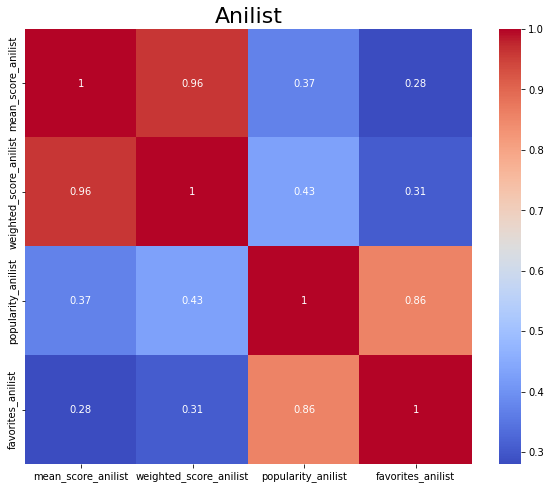

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Anilist', fontsize=22)
sns.heatmap(df_anilist.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

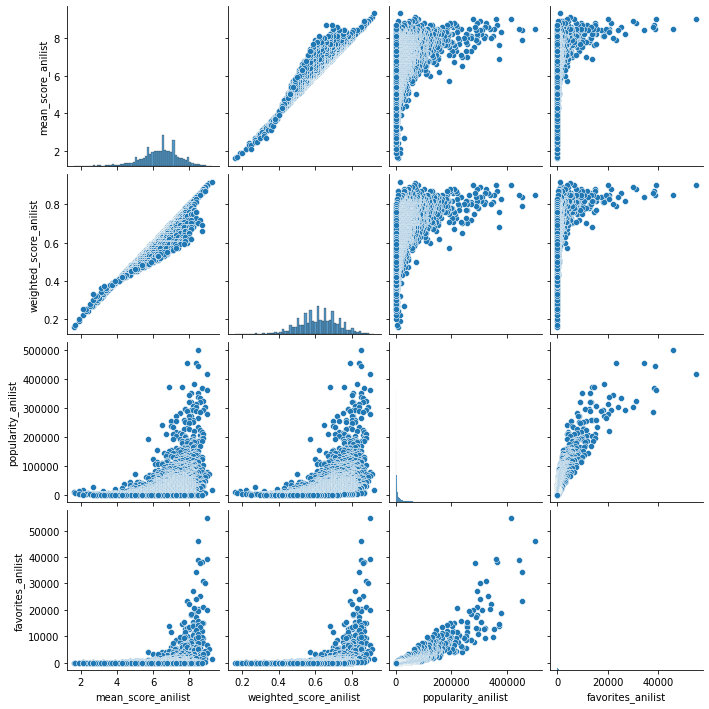

In [ ]:
sns.pairplot(df_anilist, height=2.5)

## **Anisearch**

###**Heatmap**

In [ ]:
df_anisearch = df_anisearch.dropna(subset=['mean_score_anisearch', 'popularity_anisearch',
                                 'favorites_anisearch', 'number_scorer_anisearch'])
df_anisearch = df_anisearch[['mean_score_anisearch', 'popularity_anisearch',
                                 'favorites_anisearch', 'number_scorer_anisearch']]
df_anisearch.head()

,mean_score_anisearch,popularity_anisearch,favorites_anisearch,number_scorer_anisearch
0,8.60,31.0,1018.0,6963.0
1,9.00,4.0,1182.0,11737.0
2,8.18,152.0,273.0,3185.0
3,8.68,20.0,237.0,2335.0
4,8.54,41.0,383.0,4311.0


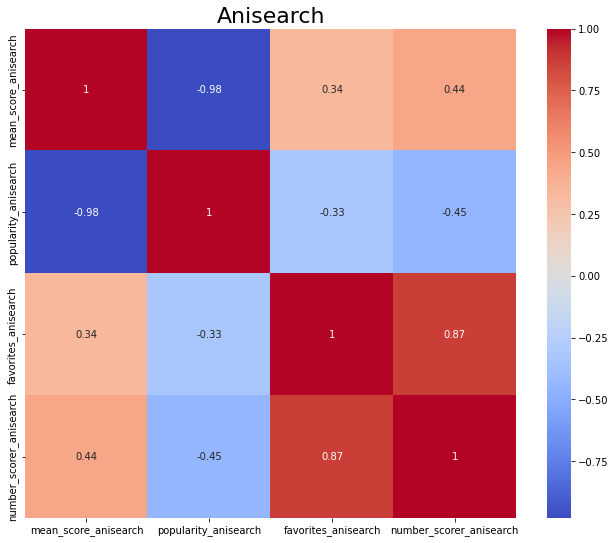

In [ ]:
# Plot heatmap
plt.figure(figsize=(11, 9))
plt.title('Anisearch', fontsize=22)
# plt.tick_params(axis='x', labelrotation=15)
# plt.tick_params(axis='y', labelrotation=20)
sns.heatmap(df_anisearch.corr(), annot=True, cmap="coolwarm")

###**Pairplot**

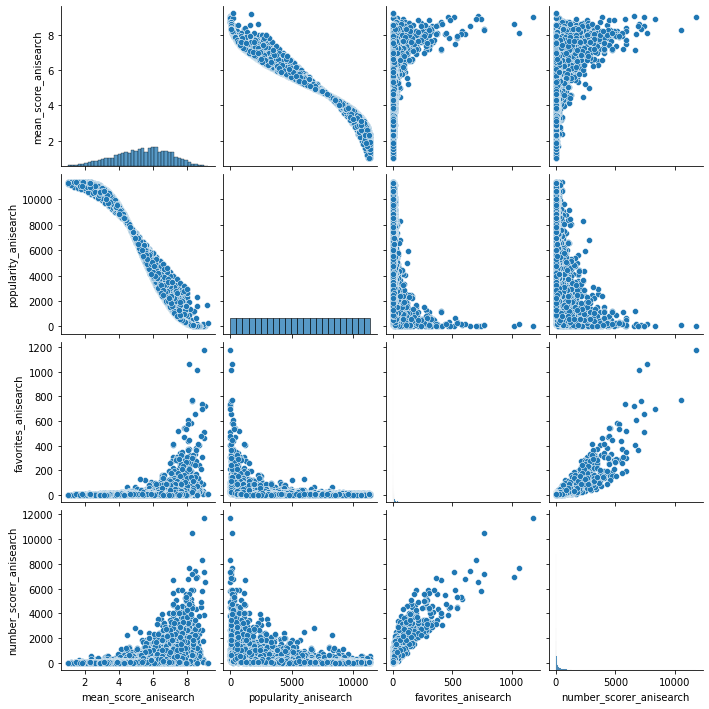

In [ ]:
sns.pairplot(df_anisearch, height=2.5)

##**Kitsu**

###**Heatmap**

In [ ]:
df_kitsu.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

In [ ]:
df_kitsu = df_kitsu.dropna(subset=['mean_score_kitsu','favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu'])
df_kitsu = df_kitsu[['mean_score_kitsu','user_count_kitsu', 'rating_rank_kitsu', 'favorite_count_kitsu']]
df_kitsu.head(5)

,mean_score_kitsu,user_count_kitsu,rating_rank_kitsu,favorite_count_kitsu
0,8.49,350376.0,11.0,6835.0
1,8.36,303639.0,25.0,5750.0
2,8.45,325631.0,15.0,4349.0
3,8.43,243790.0,18.0,6271.0
4,8.35,341696.0,26.0,3384.0


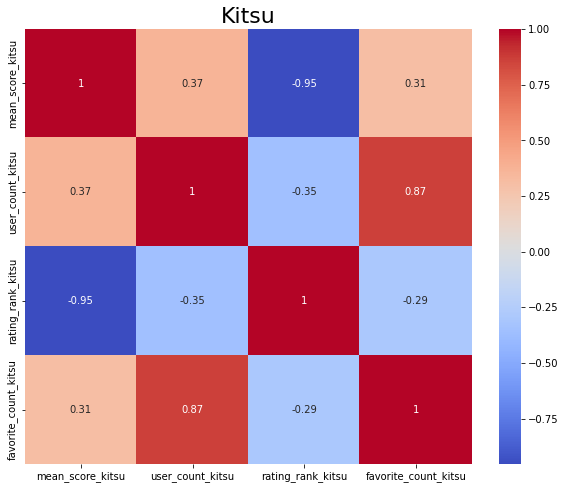

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title("Kitsu", fontsize=22)
sns.heatmap(df_kitsu.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

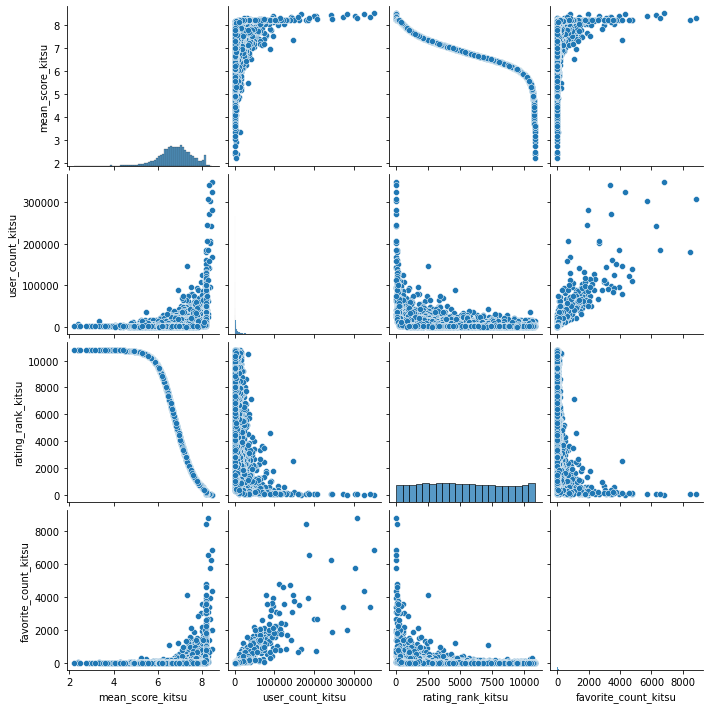

In [ ]:
sns.pairplot(df_kitsu, height=2.5)

##**MAL**

###**Heatmap**

In [ ]:
df_mal = df_mal.dropna(subset=['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                                'favorites_mal'])
df_mal = df_mal[['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                  'favorites_mal']]
df_mal.head()

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,8.51,3104669.0,2168959.0,137690.0
1,8.63,3130472.0,2159771.0,142925.0
2,7.99,2396529.0,1624157.0,50118.0
3,8.57,2069110.0,1380152.0,67452.0
4,9.06,2123271.0,1245840.0,164535.0


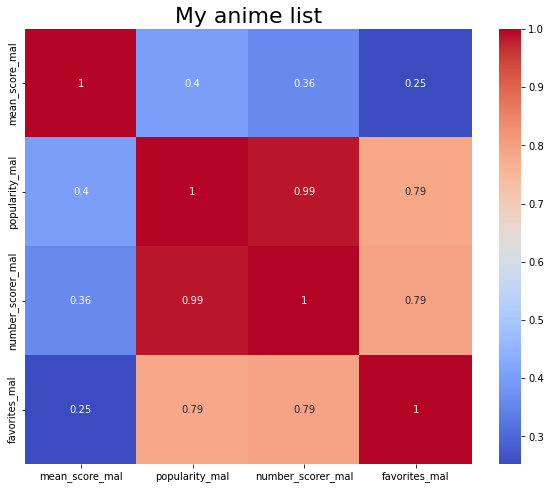

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('My anime list', fontsize=22)
sns.heatmap(df_mal.corr(), annot=True, cmap="coolwarm")

###**Pairplot**

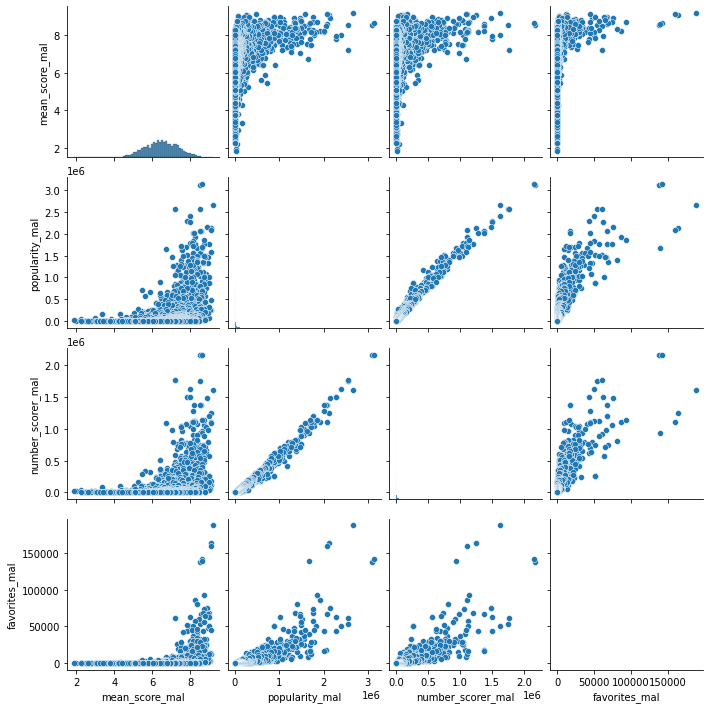

In [ ]:
sns.pairplot(df_mal, height=2.5)